# 🧠 Logistic Regression - Sentiment Classifier

This notebook builds a **sentiment analysis model** using Logistic Regression. It processes text reviews using **TF-IDF vectorization**, trains a model, evaluates it with standard metrics, and exports the predictions for **Power BI visualizations**.

## 📌 Objective

- Transform cleaned Amazon Fine Food reviews using **TF-IDF**.
- Train a **Logistic Regression classifier** to identify `positive` or `negative` sentiments.
- Visualize the **confusion matrix** and evaluate metrics.
- Export predictions to CSV for **Power BI dashboard integration**.

## 📦 Step 1: Load Cleaned Dataset

In [1]:
import pandas as pd

# Load cleaned review dataset
df = pd.read_csv('cleaned_reviews.csv')
print(f"✅ Loaded dataset with {df.shape[0]} rows and {df.shape[1]} columns")
df.head()

✅ Loaded dataset with 525789 rows and 8 columns


,Time,Score,Text,Summary,ProductId,HelpfulnessNumerator,HelpfulnessDenominator,sentiment
0,2011-04-27,5,I have bought several of the Vitality canned d...,Good Quality Dog Food,B001E4KFG0,1,1,positive
1,2012-09-07,1,Product arrived labeled as Jumbo Salted Peanut...,Not as Advertised,B00813GRG4,0,0,negative
2,2008-08-18,4,This is a confection that has been around a fe...,"""Delight"" says it all",B000LQOCH0,1,1,positive
3,2011-06-13,2,If you are looking for the secret ingredient i...,Cough Medicine,B000UA0QIQ,3,3,negative
4,2012-10-21,5,Great taffy at a great price. There was a wid...,Great taffy,B006K2ZZ7K,0,0,positive


## 🧠 Step 2: Define Features and Labels

In [2]:
# Define input features and target labels
X = df['Text']                 # Review text
y = df['sentiment']           # Sentiment labels: positive/negative

## 🧹 Step 3: Text Vectorization using TF-IDF

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert text data into TF-IDF features
tfidf = TfidfVectorizer(max_features=5000, stop_words='english')
X_tfidf = tfidf.fit_transform(X)
print("✅ TF-IDF vectorization complete")

✅ TF-IDF vectorization complete


## 🧪 Step 4: Train-Test Split

In [4]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)
print(f"🧪 Training samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}")

🧪 Training samples: 420631, Testing samples: 105158


## ⚙️ Step 5: Train the Logistic Regression Model

In [5]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the classifier
model = LogisticRegression()
model.fit(X_train, y_train)
print("✅ Model training completed")

✅ Model training completed


## 📊 Step 6: Evaluate Model Performance

In [6]:
from sklearn.metrics import classification_report

# Predict on test data
y_pred = model.predict(X_test)

# Generate evaluation report
report = classification_report(y_test, y_pred, output_dict=True)

# Display as a DataFrame
pd.DataFrame(report).T

,precision,recall,f1-score,support
negative,0.829128,0.682129,0.748479,16233.00000
positive,0.943793,0.974338,0.958822,88925.00000
accuracy,0.929230,0.929230,0.929230,0.92923
macro avg,0.886460,0.828233,0.853651,105158.00000
weighted avg,0.926092,0.929230,0.926352,105158.00000


📝 **Metrics Explained**  
- **Precision**: True Positives / (True Positives + False Positives)  
- **Recall**: True Positives / (True Positives + False Negatives)  
- **F1-Score**: Harmonic mean of precision and recall  
- **Support**: Number of samples for each class

## 📉 Step 7: Confusion Matrix Visualization

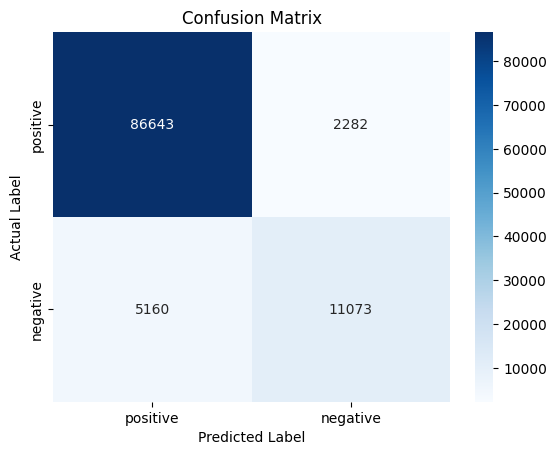

In [7]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=['positive', 'negative'])

# Plot using Seaborn
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['positive', 'negative'],
            yticklabels=['positive', 'negative'])

plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

🧩 **Confusion Matrix Key**  
- **True Positives (TP)**: Correctly predicted positives  
- **True Negatives (TN)**: Correctly predicted negatives  
- **False Positives (FP)**: Incorrectly predicted positives  
- **False Negatives (FN)**: Incorrectly predicted negatives

## 📁 Step 8: Export Predictions for Power BI

In [9]:
# Predict on full dataset
df['predicted_sentiment'] = model.predict(tfidf.transform(df['Text']))

# Export selected columns with predictions
df[['Time', 'ProductId', 'Score', 'Text', 'sentiment', 'predicted_sentiment']].to_csv('sentiment_output_ml_model.csv', index=False)

print("📁 Exported predictions to 'sentiment_output.csv'")

📁 Exported predictions to 'sentiment_output.csv'


## ✅ Final Notes

- The **Logistic Regression model** provides efficient and interpretable sentiment predictions.
- Predictions are saved in CSV format, ready for **Power BI visual analytics**.
- Evaluation metrics and confusion matrix offer insights into performance.

> ✨ _Next Step_: Integrate the predictions into your Power BI dashboard using `sentiment_output.csv`.